# PREDICTING HOUSE PRICES USING MACHINE LEARNING

# Phase 3 : Development Part 1

In this part we will begin building our project by loading and preprocessing the dataset. 

Start building the house price prediction model by loading and preprocessing the dataset. 

Load the housing dataset and preprocess the data. 

Dataset Link: https://www.kaggle.com/datasets/vedavyasv/usa-housing

# I.IMPORTING THE NECESSARY LIBRARIES

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# II.LOADING THE DATASET

In [4]:
# Load the housing dataset
df = pd.read_csv('USA_Housing.csv')

In [5]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# III. DATA EXPLORATION

In [7]:
# Generate dataset description for numerical columns
numeric_description = df.describe()

# Generate dataset description for all columns (including categorical)
all_description = df.describe(include='all')

# Print the descriptions
print("Summary Statistics for Numerical Columns:")
print(numeric_description)

print("\nSummary Statistics for All Columns:")
print(all_description)

Summary Statistics for Numerical Columns:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min   

# IV. HANDLING MISSING VALUES

There are two main ways to handle missing values in Python:

DROPPING MISSING VALUES : This is the simplest way to handle missing values, but it can lead to data loss. To drop missing values in Python, you can use the dropna() method.

In [8]:
# Drop rows with missing values
df = df.dropna()

INPUTTING MISSING VALUES : This involves filling in missing values with a reasonable value. There are many different imputation methods available in Python, such as mean imputation, median imputation, and mode imputation.

In [9]:
# Impute missing values with the mean
df = df.fillna(method='ffill')

To handle missing values, we can use the sklearn.impute module. This module provides a variety of imputation methods, such as mean imputation, median imputation, and k-nearest neighbors imputation.

The following code shows how to use mean imputation to handle missing values in the train and test sets:

from sklearn.impute import SimpleImputer

#Create a SimpleImputer object
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

#Impute missing values in the train and test sets
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# V. HANDLING CATEGORICAL VALUES

Categorical data is data that can be categorized into different groups, such as "male" and "female" for gender. Categorical data needs to be converted into numerical data before it can be used by machine learning algorithms.

One way to convert categorical data into numerical data is to use dummy variables. Dummy variables are binary variables that represent each category in a categorical variable.

## Dummy variables are used for categorical data.For continuous numerical variables like "Avg. Area Income" or "Price",  no dummy variables are needed.

In [10]:
# Create dummy variables for the categorical variables
# df = pd.get_dummies(df, columns=['column_name'])

 # VI. SCALLING THE DATA

Scaling the data involves transforming the data so that it has a mean of 0 and a standard deviation.

In [11]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Address', axis=1))

# VII. SPLITTING THE DATA INTO TRAINING SETS AND TESTING SETS

Once the data has been preprocessed, it needs to be split into training and testing sets. The training set is used to train the machine learning model, and the testing set is used to evaluate the model's performance.

To split the data into training and testing sets in Python, you can use the train_test_split() function from the scikit-learn library.

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['Price'], test_size=0.25, random_state=42)

# VIII. CREATING A DECISION TREE MODEL

To predict the price of a new house, the model would simply evaluate the square footage of the house and then follow the corresponding branch down the tree.

Decision tree models are a powerful tool for house price prediction because they can learn complex relationships between the features and the target price. They are also relatively easy to understand and interpret, which makes them a good choice for many homeowners and real estate professionals.

Here is a simplified example,

Root node: Is the square footage of the house greater than 2,000?

Left branch: If yes, the predicted price of the house is $500,000.

Right branch: If no, the predicted price of the house is $300,000.

In [13]:
# Create a decision tree model
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Evaluate the performance of the model on the testing set
y_pred = model.predict(X_test)
r2_score = model.score(X_test, y_test)
print('R2 score:', r2_score)

R2 score: 0.9997967065355885


# IX. VISUALIZE THE PREPROCESSED DATASET 

We can differentiate whether the data is preprocessed or not using visualization. Here are some ways to do it:

i.Look for Outliers.

ii.Check for the consistent Data Types.

iii.Look for missing values.

iv.Compare the visualization to the knowledge of the data

This code will create three visualizations:

A scatter plot of average area income vs. sale price                                                                               
A histogram of sale price

A heatmap of the correlation matrix

You can use these visualizations to identify potential problems with the data, such as outliers, inconsistencies in the data types, and missing values.

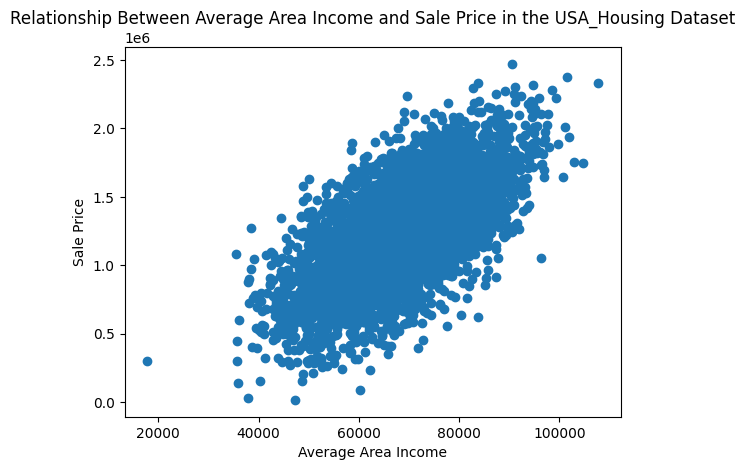

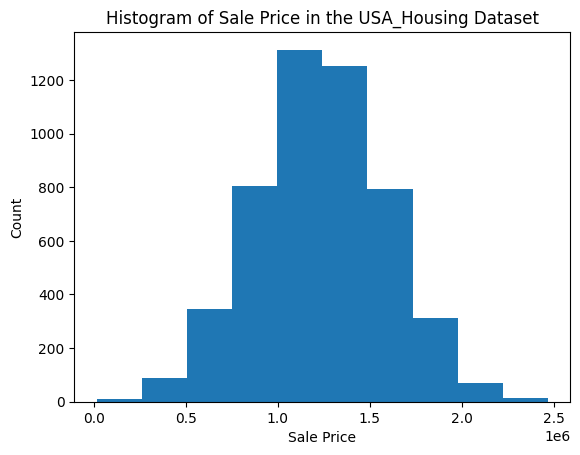

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_9168\2259529573.py:32: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


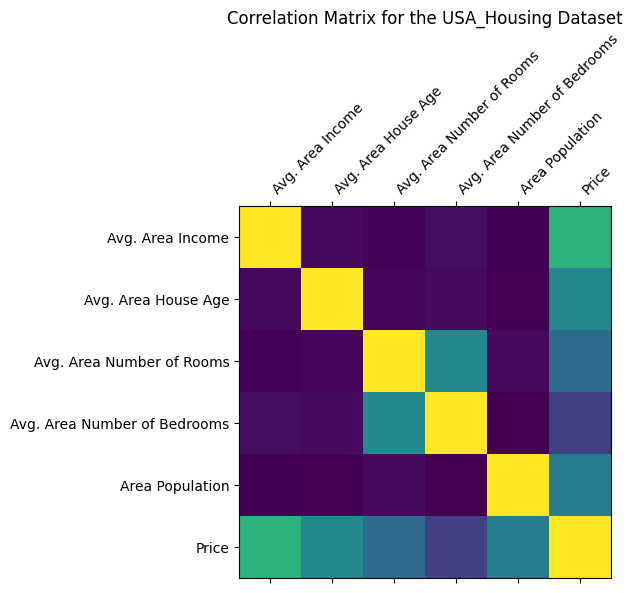

In [14]:
import matplotlib.pyplot as plt

# Create a scatter plot to visualize the relationship between average area income and sale price
x = df["Avg. Area Income"]
y = df["Price"]
plt.scatter(x, y)

# Add labels to the axes
plt.xlabel("Average Area Income")
plt.ylabel("Sale Price")

# Add a title to the plot
plt.title("Relationship Between Average Area Income and Sale Price in the USA_Housing Dataset")

# Show the plot
plt.show()

# Create a histogram of the sale price
plt.hist(df["Price"])

# Add labels to the axes
plt.xlabel("Sale Price")
plt.ylabel("Count")

# Add a title to the plot
plt.title("Histogram of Sale Price in the USA_Housing Dataset")

# Show the plot
plt.show()

# Create a heatmap of the correlation matrix
corr = df.corr()
plt.matshow(corr)

# Add labels to the axes
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="left")
plt.yticks(range(len(corr.columns)), corr.columns)

# Add a title to the plot
plt.title("Correlation Matrix for the USA_Housing Dataset")

# Show the plot
plt.show()
